# 曾正豪 0716325

In [21]:
import random
import math
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

In [22]:
x = []
y = []
with open('seeds_dataset.txt', newline='') as f:
    lines = f.readlines()
    for line in lines:
        line_split = line.split()
        x.append([])
        for i in range(7):
            x[-1].append(float(line_split[i]))
        y.append(int(line_split[7]) - 1)

temp = list(zip(x, y))
random.shuffle(temp)
x, y = zip(*temp)

True label: (1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2)
Predicting label from K-means: [1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2

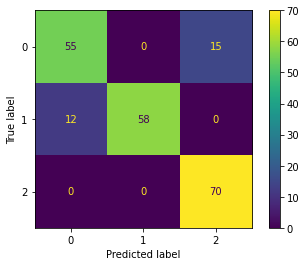

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        70
           1       1.00      0.83      0.91        70
           2       0.82      1.00      0.90        70

    accuracy                           0.87       210
   macro avg       0.88      0.87      0.87       210
weighted avg       0.88      0.87      0.87       210



In [23]:
def l2_distance(x:list, y:list) -> float:
    sum = 0.0
    for i in range(len(x)):
        sum += (x[i] - y[i]) ** 2
    return sum ** 0.5

def K_means_clustering(data_points:list, k: int) -> list:
    n = len(data_points)
    dimension = len(data_points[0])
    belong = [0] * n
    new_belong = [0] * n
    stop = False
    c = [[0,0,0],[0,0,0],[0,0,0]]

    for i in range(k):
        c[i] = data_points[random.randint(0, n-1)]

    while not stop:
        for i in range(n):
            closet = 0
            distance = 9999999
            for j in range(k):
                new_distance = l2_distance(data_points[i], c[j])
                if new_distance < distance:
                    closet = j
                    distance = new_distance
            new_belong[i] = closet
        
        for i in range(k):
            num = 0
            c[i] = [0]*dimension
            for j in range(n):
                if new_belong[j] == i:
                    num += 1
                    for l in range(dimension):
                        c[i][l] += data_points[j][l]
            for l in range(dimension):
                c[i][l] = c[i][l] if num == 0 else c[i][l] / num
        stop = True
        for i in range(n):
            if belong[i] != new_belong[i]:
                stop = False
        #print(new_belong)
        belong = new_belong
    return belong

def K_means_label_mapping(x:list, y: list) -> list:#匈牙利演算法
    mapping = {0:0, 1:1, 2:2}
    table = [[0 for i in range(3)]for i in range(3)]
    for i in range(len(x)):
        table[ x[i] ][ y[i] ] += 1
    
    max_val = table[0][0] + table[1][1] + table[2][2]

    for i in range(3):
        for j in range(3):
            for k in range(3):
                new_val = table[0][i] + table[1][j] + table[2][k]
                if new_val > max_val and i != j and j != k and i != k:
                    mapping[0] = i
                    mapping[1] = j
                    mapping[2] = k
                    max_val = new_val
    return mapping

pred = K_means_clustering(x,3)
mapping = K_means_label_mapping(pred, y)
print('True label:',y)

print('Predicting label from K-means:',pred)
print('The mapping relation:',mapping)
for i in range(len(pred)):
    pred[i] = mapping[pred[i]]
print('Predicting label from K-means after mapping:',pred)

CM = confusion_matrix(y, pred)
report = classification_report(y, pred)
ConfusionMatrixDisplay(confusion_matrix=CM).plot()
plt.show()
print(report)

# Questions - K-means Clustering
### Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance.

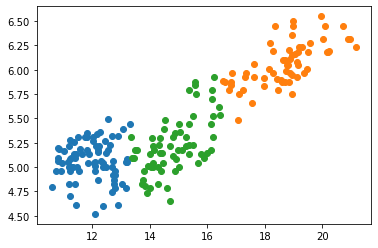

In [24]:
x = []
y = []
with open('seeds_dataset.txt', newline='') as f:
    lines = f.readlines()
    for line in lines:
        line_split = line.split()
        x.append([])
        x[-1].append(float(line_split[0]))
        x[-1].append(float(line_split[6]))
        y.append(int(line_split[7]) - 1)
pred = K_means_clustering(x,3)

for idx in range(len(pred)):
    if pred[idx] == 0:
        plt.scatter(x[idx][0], x[idx][1], c = '#1f77b4')
    elif pred[idx] == 1:
        plt.scatter(x[idx][0], x[idx][1], c = '#ff7f0e')
    elif pred[idx] == 2:
        plt.scatter(x[idx][0], x[idx][1], c = '#2ca02c')

plt.show()